### ▶2023/11/13 UMAPのライブラリの試運転（Digit，MNISTデータセット）
### ▶t-SNEのパラメータ：https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [116]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.manifold import TSNE

##### ▶Digits

In [2]:
# digits = datasets.load_digits()
# df = pd.DataFrame(digits.data, columns=digits.feature_names)
# df['target'] = digits.target

# perplexity_list =[0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

# for p in perplexity_list:
#     tsne_model = TSNE(n_components=2, random_state = 0, perplexity = p, n_iter = 1000)
#     tsne_result = tsne_model.fit_transform(digits.data)
#     df['axis0'] = tsne_result[:, 0:1]
#     df['axis1'] = tsne_result[:, 1:2]
#     sns.scatterplot(x='axis0', y='axis1', hue=df['target'], data=df, palette=sns.color_palette("Paired", 24))

# mapper = umap.UMAP(n_components=2, n_neighbors=10, random_state=0)
# umap_result = mapper.fit_transform(digits.data)
# df['axis0'] = umap_result[:, 0:1]
# df['axis1'] = umap_result[:, 1:2]
# sns.scatterplot(x='axis0', y='axis1', hue=df['target'], data=df, palette=sns.color_palette("Paired", 24))

##### ▶中央値を品種1に揃える

In [194]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]
df_2 = df[df['target'] == 2]
df_0 = df_0.drop('target', axis=1)
df_1 = df_1.drop('target', axis=1)
df_2 = df_2.drop('target', axis=1)

df0_plus_med = pd.DataFrame({})
df2_minus_med = pd.DataFrame({})

for col in df_0.columns:
    if col == 'sepal width (cm)':
        df0_new_ser = [ val + np.abs(df_1.median()['petal length (cm)'] - df_0.median()[col]) for val in df_0[col]]
    elif col == 'petal length (cm)':
        df0_new_ser = [ val + np.abs(df_1.median()['sepal width (cm)'] - df_0.median()[col]) for val in df_0[col]]
    else:
        df0_new_ser = [ val + np.abs(df_1.median()[col] - df_0.median()[col]) for val in df_0[col]]
        
    df2_new_ser = [ val - np.abs(df_1.median()[col] - df_2.median()[col]) for val in df_2[col]]
    df0_plus_med[col] = df0_new_ser
    df2_minus_med[col] = df2_new_ser
    
df_standardized = pd.concat([df0_plus_med , df_1 ,df2_minus_med], axis=0)
df_standardized['target'] = iris.target

df_standardized.to_excel('../temp/iris_df0_23change_plusminusmed.xlsx')


df_standardized

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,6.0,4.45,2.7,1.3,0
1,5.8,3.95,2.7,1.3,0
2,5.6,4.15,2.6,1.3,0
3,5.5,4.05,2.8,1.3,0
4,5.9,4.55,2.7,1.3,0
...,...,...,...,...,...
45,6.1,2.80,4.0,1.6,2
46,5.7,2.30,3.8,1.2,2
47,5.9,2.80,4.0,1.3,2
48,5.6,3.20,4.2,1.6,2


In [120]:
def boxplot_serlist(serlist, label, ymax):
    title = ''
    plt.rcParams['font.family'] = 'MS Gothic'
    FIG_WIDTH = 15
    FIG_HEIGHT = 5
    fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_HEIGHT), facecolor='white')
    ax.set_xlim(0, ymax)
    ax.grid(True)
    ax.set_xticklabels(label)

    ax.set_title(title)
    
    ax.boxplot( serlist,
                vert=False,  # 横向きにする
                patch_artist=True,  # 細かい設定をできるようにする
                widths=0.9,  # boxの幅の設定
                boxprops=dict(facecolor='#1E90FF80',  # boxの塗りつぶし色の設定
                                color='black', linewidth=1),  # boxの枠線の設定
                medianprops=dict(color='black', linewidth=1),  # 中央値の線の設定
                whiskerprops=dict(color='black', linewidth=1),  # ヒゲの線の設定
                capprops=dict(color='black', linewidth=1),  # ヒゲの先端の線の設定
                flierprops=dict(markeredgecolor='black', markeredgewidth=1)  # 外れ値の設定
                )
    
    # num = 47
    # serlist_ext = [ ser[num] for ser in serlist]
    
    # ax.scatter([4.9, 2.5, 4.5, 1.7], [4, 3, 2, 1], color='red', marker='o', alpha=1)
    
    plt.show()
    return

C:\Users\ispec\AppData\Local\Temp\ipykernel_10912\3246318774.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(label)


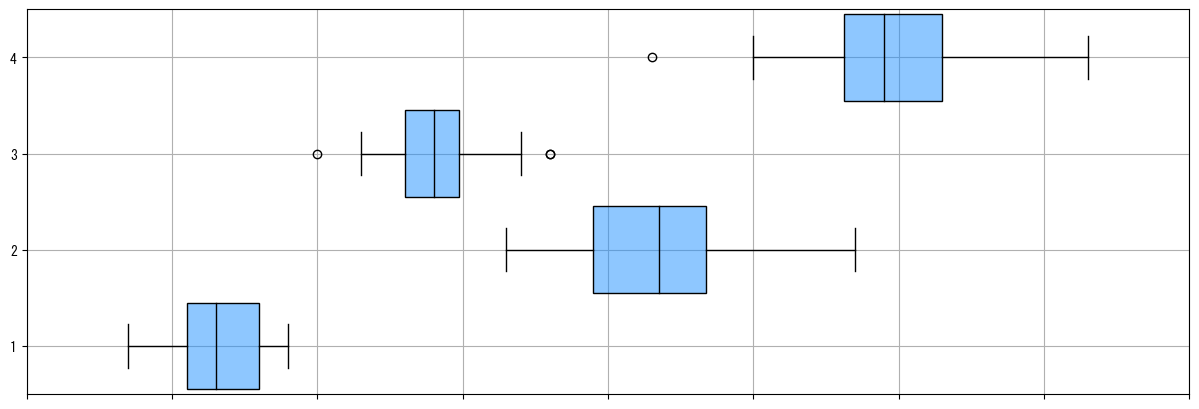

In [198]:
df = pd.read_excel('../temp/iris_df0_23change_plusminusmed.xlsx', index_col=0)
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]
df_2 = df[df['target'] == 2]

df = df.drop('target', axis=1)
numpy_changecol = df.to_numpy()
df['target'] = iris.target

df_show = df_2
sers = [ df_show['petal width (cm)'], df_show['petal length (cm)'], df_show['sepal width (cm)'], df_show['sepal length (cm)']]
boxplot_serlist(sers, ['', '', '', ''], 8)

In [113]:
# iris = datasets.load_iris()
# df = pd.DataFrame(iris.data, columns=iris.feature_names)
# df['target'] = iris.target

# df_0 = df[df['target'] == 0]
# df_1 = df[df['target'] == 1]
# df_2 = df[df['target'] == 2]

# # ### 列を入れ替えてみる ###
# df_0_sl = df['sepal length (cm)']
# df_0_sw = df['sepal width (cm)']
# df_0_pl = df['petal length (cm)']
# df_0_pw = df['petal width (cm)']

# change_col = 'sepal length (cm)'
# insert_col_num = 3
# df_drop = df[change_col]
# df = df.drop(change_col, axis=1)
# df.insert(insert_col_num, change_col, df_drop)

# change_col = 'sepal width (cm)'
# insert_col_num = 2
# df_drop = df[change_col]
# df = df.drop(change_col, axis=1)
# df.insert(insert_col_num, change_col, df_drop)

# change_col = 'petal length (cm)'
# insert_col_num = 1
# df_drop = df[change_col]
# df = df.drop(change_col, axis=1)
# df.insert(insert_col_num, change_col, df_drop)

# df = df.drop('target', axis=1)  # 2列目削除
# numpy_changecol = df.to_numpy()
# numpy_changecol

# df['target'] = df['target'] = iris.target
# df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


##### ▶パラメータを変更して実行

In [200]:
palette = ['#CC521D', '#4F4AD7', '#39AE3D']
perplexity = [ i for i in range(5, 51, 1)]
n_iter = [ i for i in range(250, 1010, 10)]

for value in n_iter:
    tsne_model = TSNE(n_components=2,
                    perplexity=30.0,
                    early_exaggeration=12.0, 
                    learning_rate='auto',
                    n_iter=value,
                    n_iter_without_progress=300,
                    min_grad_norm=1e-07,
                    metric='euclidean', 
                    metric_params=None,
                    init='pca',
                    verbose=0,
                    random_state=None, 
                    method='barnes_hut',
                    angle=0.5,
                    n_jobs=None
                    )

    tsne_result = tsne_model.fit_transform(numpy_changecol)

    df[f'axis0'] = tsne_result[:, 0:1]
    df[f'axis1'] = tsne_result[:, 1:2]

    sns.scatterplot(x='axis0', y='axis1', hue=df['target'], data=df, palette=palette, alpha=0.5)
    plt.savefig(f'../temp/tsne_iris_plusminusmed_perp_30/niter_{value}.jpg')
    # plt.savefig(f'../temp/tsne_iris_plusminusmed_niter_1000/perp_{value}.jpg')
    plt.close()
    print(value)
    
# df.to_excel('../temp/tsne_iris_perp30_niter_250-300.xlsx')


250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000


c:\Users\ispec\MyWorkSpace\python\drawing_2023\.venv\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<AxesSubplot: xlabel='axis0', ylabel='axis1'>

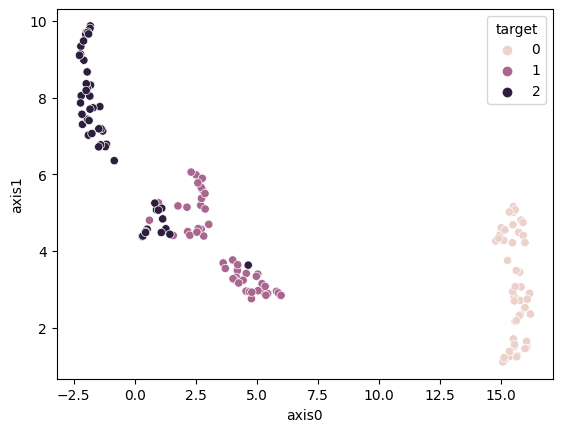

In [20]:
import umap
mapper = umap.UMAP(n_components=2, n_neighbors=10, random_state=0)
umap_result = mapper.fit_transform(iris.data)
df['axis0'] = umap_result[:, 0:1]
df['axis1'] = umap_result[:, 1:2]
sns.scatterplot(x='axis0', y='axis1', hue=df['target'], data=df)

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [4]:
df.to_excel('../temp/iris.xlsx')